/Users/sasano/gaii/.venv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
No handles with labels found to put in legend.
No handles with labels found to put in legend.


====
A min: [[0.88817555 0.        ]
 [0.         0.8912306 ]] 

Sigma min: [[0.09745835 0.00183899]
 [0.00183899 0.09848286]] 

A
 [[0.88588337 0.02869808]
 [0.01432497 0.88606868]] 
 

SigmaE
 [[0.09707414 0.00188669]
 [0.00188669 0.098389  ]] 

true A
 [[0.9  0.03]
 [0.03 0.9 ]] 

true SigmaE
 [[0.1 0. ]
 [0.  0.1]] 

[array(0.76014304, dtype=float32), array(0.70374244, dtype=float32), array(0.5836415, dtype=float32), array(0.08461106, dtype=float32), array(0.01131505, dtype=float32), array(0.00162912, dtype=float32), array(0.00038506, dtype=float32), array(0.00022526, dtype=float32), array(0.00020472, dtype=float32), array(0.00020208, dtype=float32), array(0.00020173, dtype=float32), array(0.00020168, dtype=float32), array(0.00020168, dtype=float32), array(0.00020168, dtype=float32), array(0.00020168, dtype=float32), array(0.00020168, dtype=float32), array(0.00020168, dtype=float32), array(0.00020167, dtype=float32), array(0.00020167, dtype=float32), array(0.00020167, dtype=float32

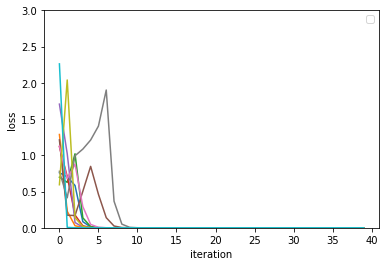

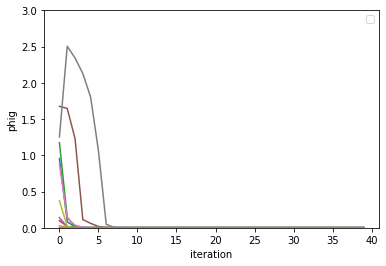

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import var
import geoii

A_true = np.array([[0.9, 0.03], [0.03, 0.9]])
Sigma_true = np.array( [[0.1, 0], [0, 0.1]])
initiali_state = np.random.multivariate_normal([0, 0], [[0.1, 0], [0, 0.1]], size=1)[0]
state_list = var.generate(initiali_state, A_true, Sigma_true)
ar = var.reestimate_var(state_list)

a = ar["A"]
sigma_e = ar["SigmaE"]
SigmaX = np.cov(state_list.T)

mask = np.array([[1, 0], [0, 1]])
result = geoii.fit_q(a,sigma_e,SigmaX, mask)
print("====")
print("A min:",result["A_min"], "\n")
print("Sigma min:",result["SigmaE_min"], "\n")
print("A\n", ar["A"], "\n", "\n")
print("SigmaE\n", ar["SigmaE"], "\n")
print("true A\n", A_true, "\n")
print("true SigmaE\n", Sigma_true, "\n")

# loss
for losses in result["loss_log"]:
    print(losses)
    plt.plot(losses)
plt.ylim((0,3))

plt.ylabel("loss")
plt.xlabel("iteration")
plt.legend()

plt.figure()

# phiG
for phiG in result["phig_log"]:
    print(phiG)
    plt.plot(phiG)
plt.ylim((0,3))
plt.ylabel("phig")
plt.xlabel("iteration")
plt.legend()
